# Bank Marketing Campaign 💳🏦💵

## 1️⃣ Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

## 2️⃣ Read the Dataset

In [2]:
path = r'Dataset\bank-additional-full.csv'
df = pd.read_csv(path, sep=";")

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3️⃣ Exploratory Data Analysis (EDA)

### Informtion

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Description

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Missing Values

In [8]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Check Duplications

In [9]:
df.duplicated().sum()

12

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

### Check Columns

#### Numeric Columns 

In [12]:
num_cols = df.select_dtypes(['int64', 'float64']).columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

##### Hist + KDE

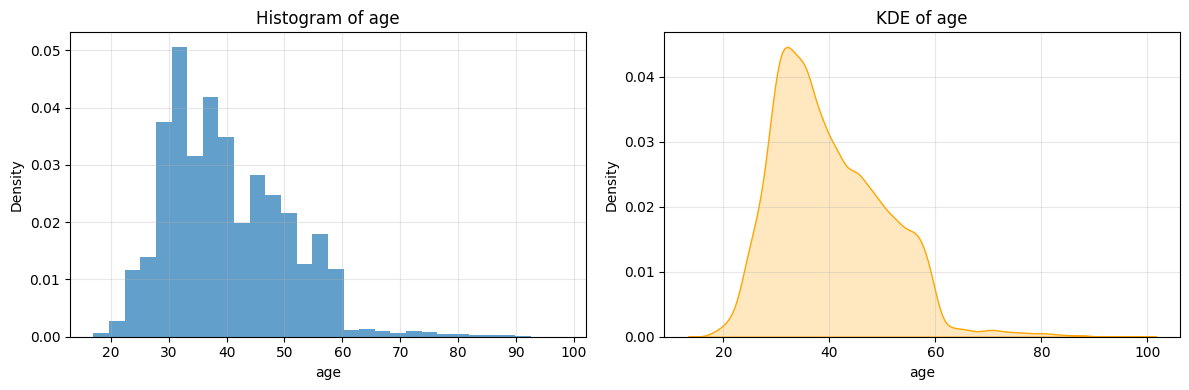

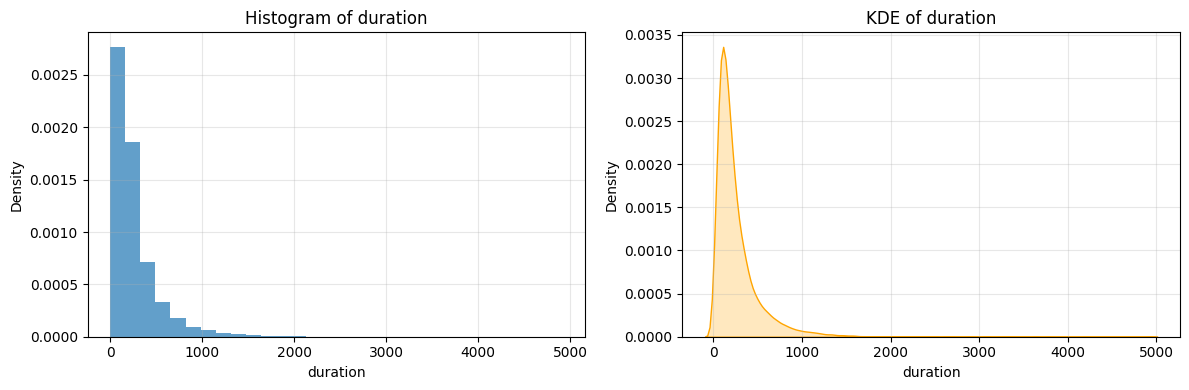

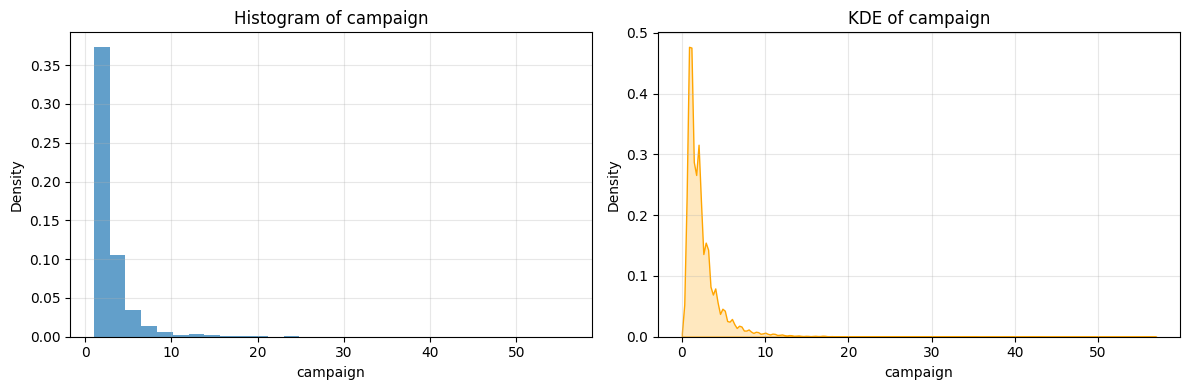

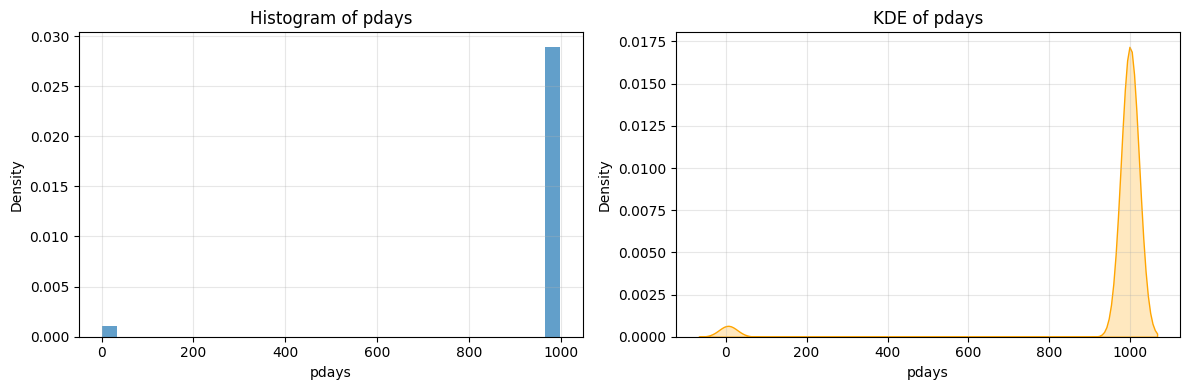

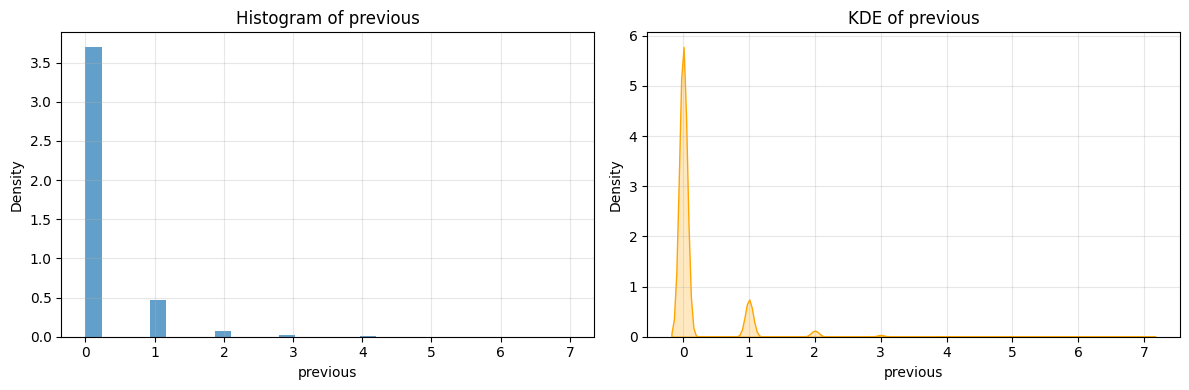

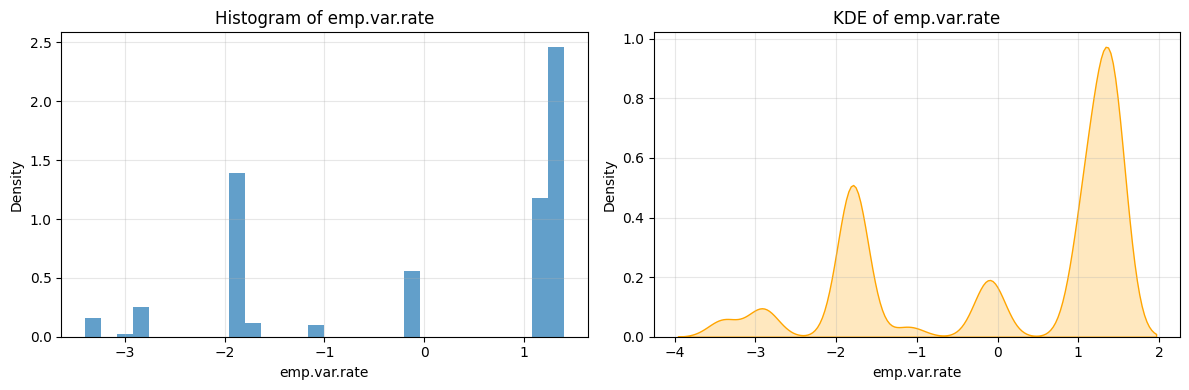

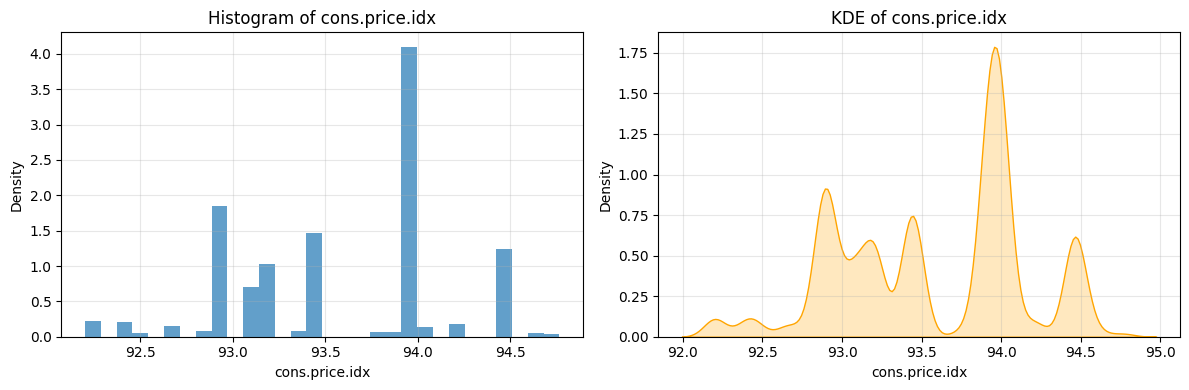

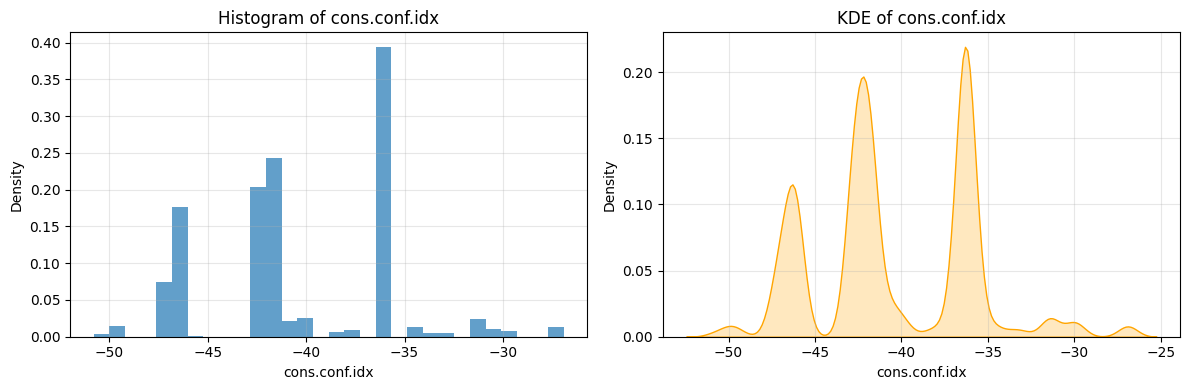

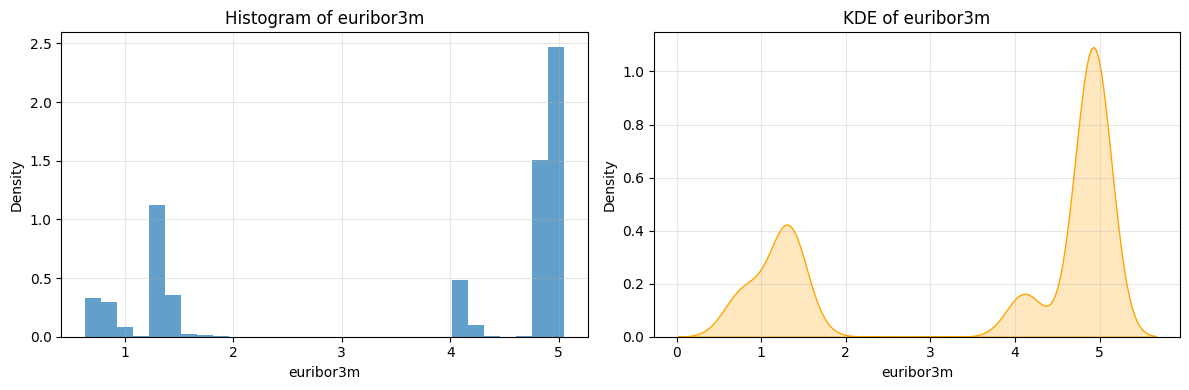

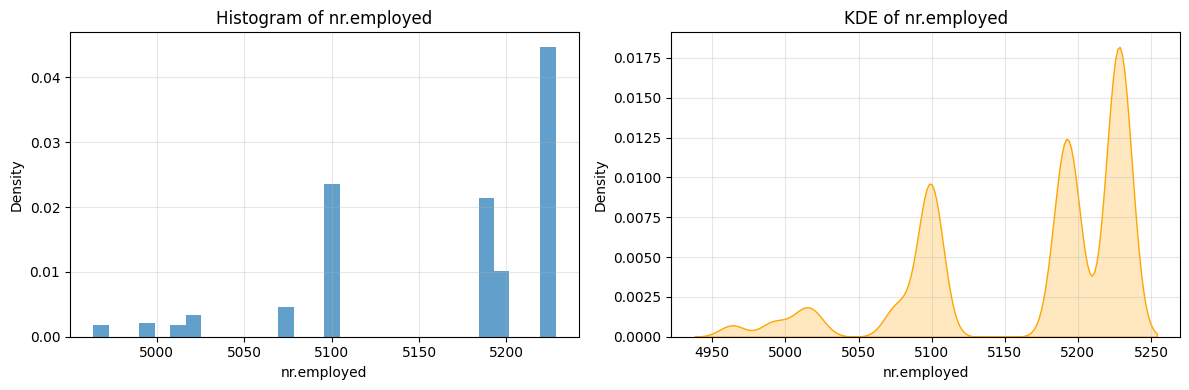

In [13]:
for col in num_cols:
    data = df[col]
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Histogram 
    axes[0].hist(data, bins=30, density=True, alpha=0.7)
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")
    axes[0].grid(alpha=0.3)

    # KDE 
    sns.kdeplot(data, fill=True, ax=axes[1], color='orange')
    axes[1].set_title(f"KDE of {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Density")
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

##### Boxplot + Violinplot

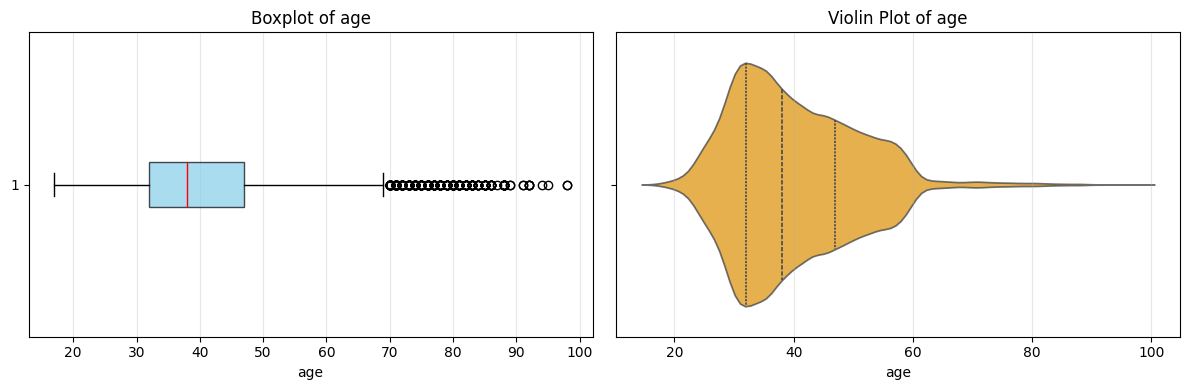

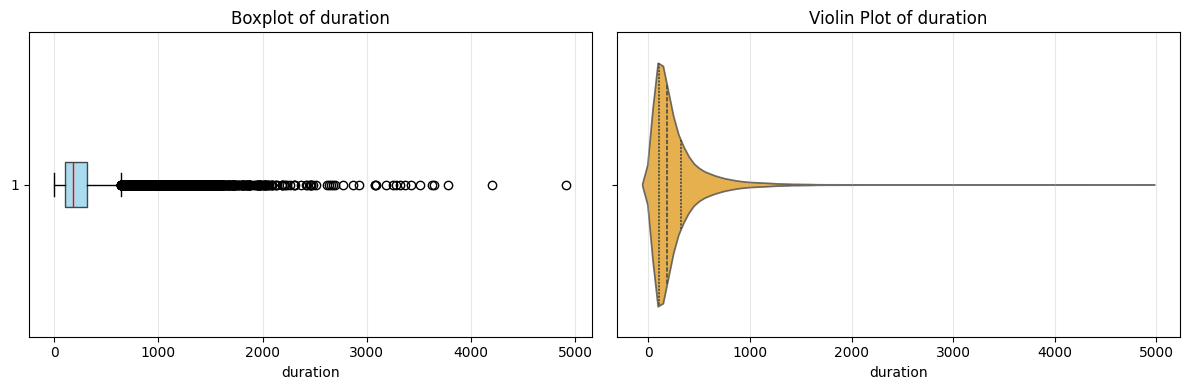

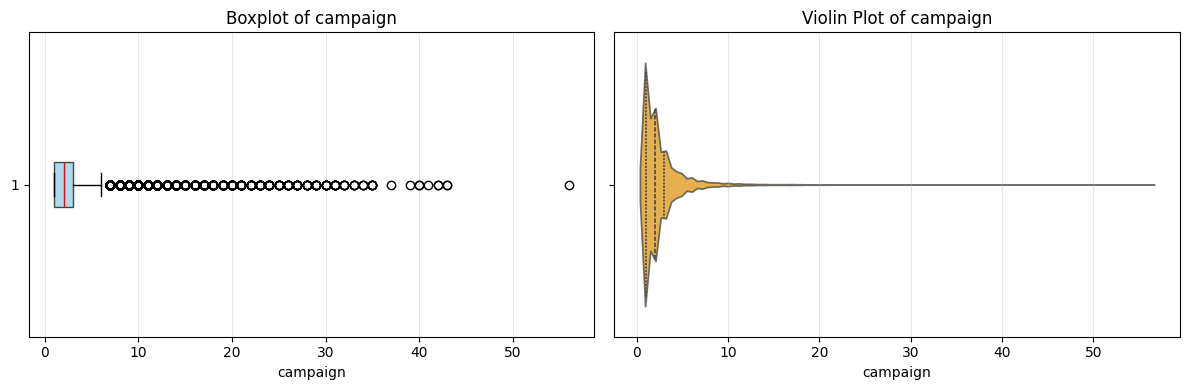

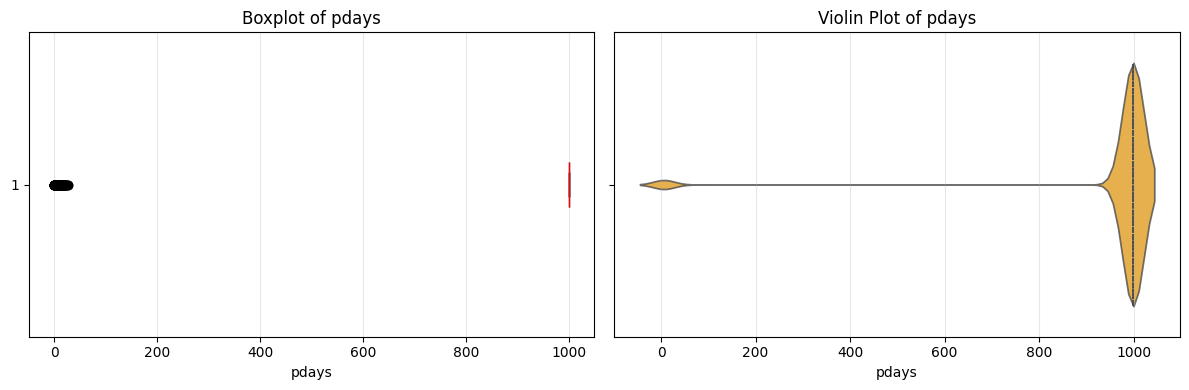

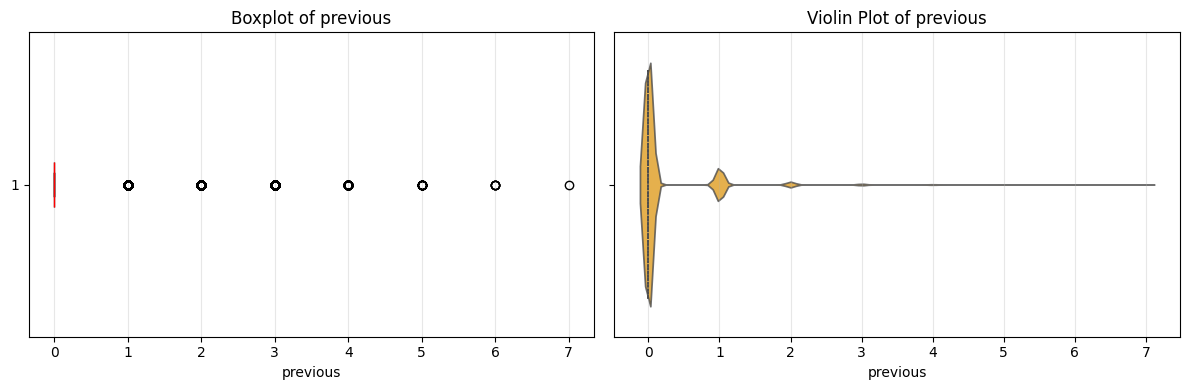

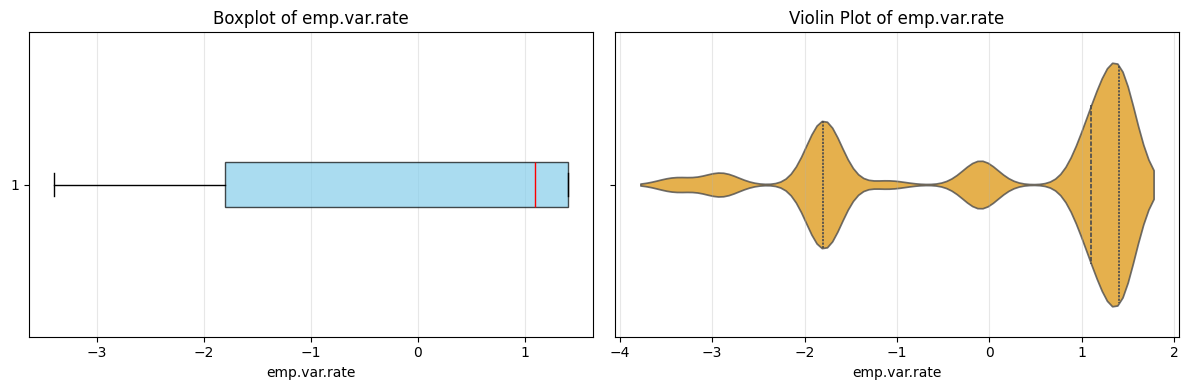

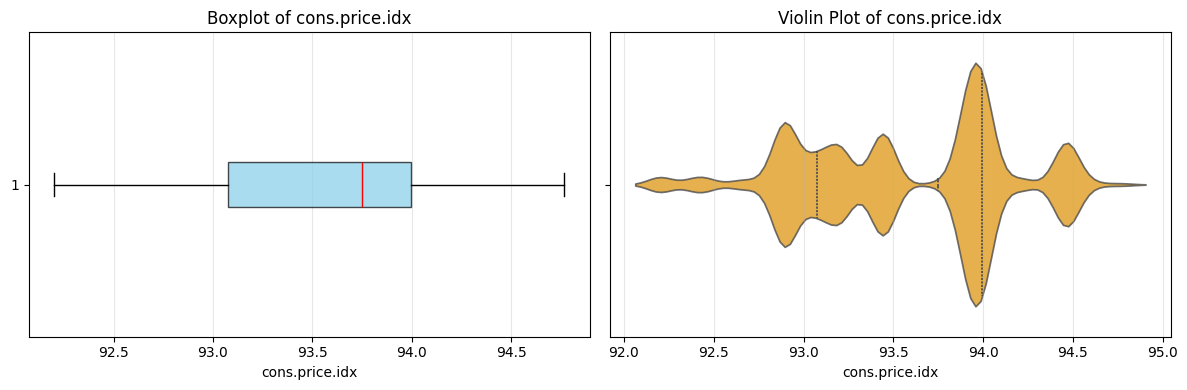

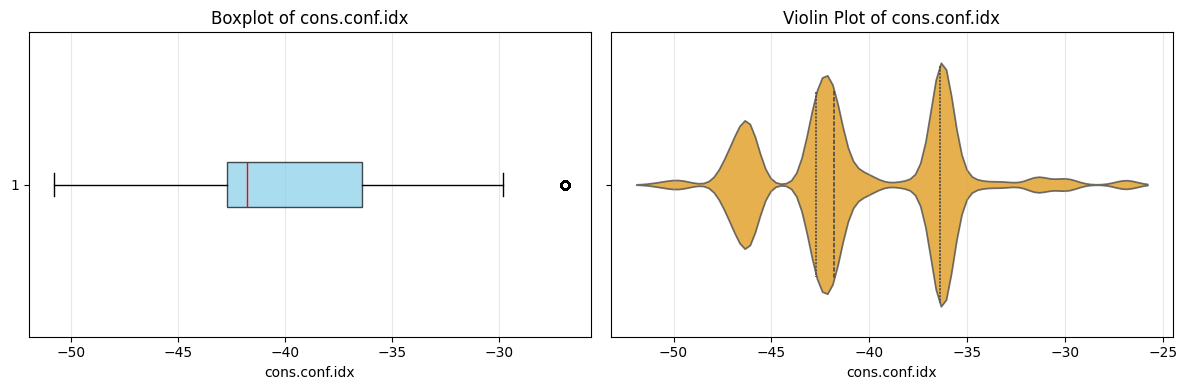

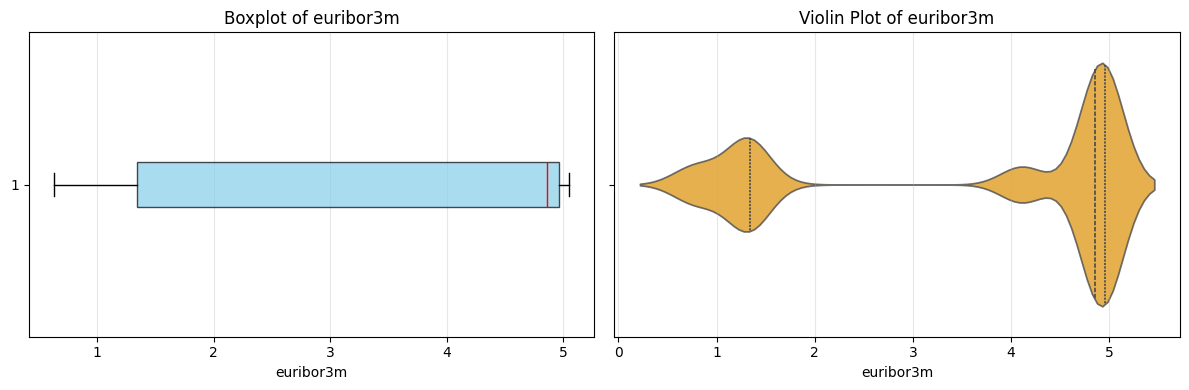

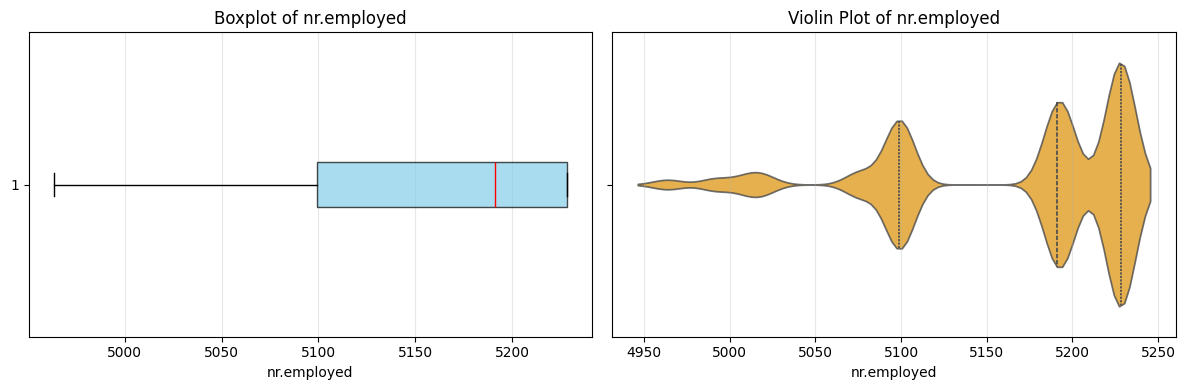

In [14]:
for col in num_cols:
    data = df[col]

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Boxplot
    axes[0].boxplot(
        data,
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='skyblue', alpha=0.7),
        medianprops=dict(color='red')
    )
    axes[0].set_title(f"Boxplot of {col}")
    axes[0].set_xlabel(col)
    axes[0].grid(axis='x', alpha=0.3)

    # Violin Plot
    sns.violinplot(
        x=data,
        ax=axes[1],
        inner='quartile',
        color='orange',
        alpha=0.8
    )
    axes[1].set_title(f"Violin Plot of {col}")
    axes[1].set_xlabel(col)
    axes[1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()


In [15]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

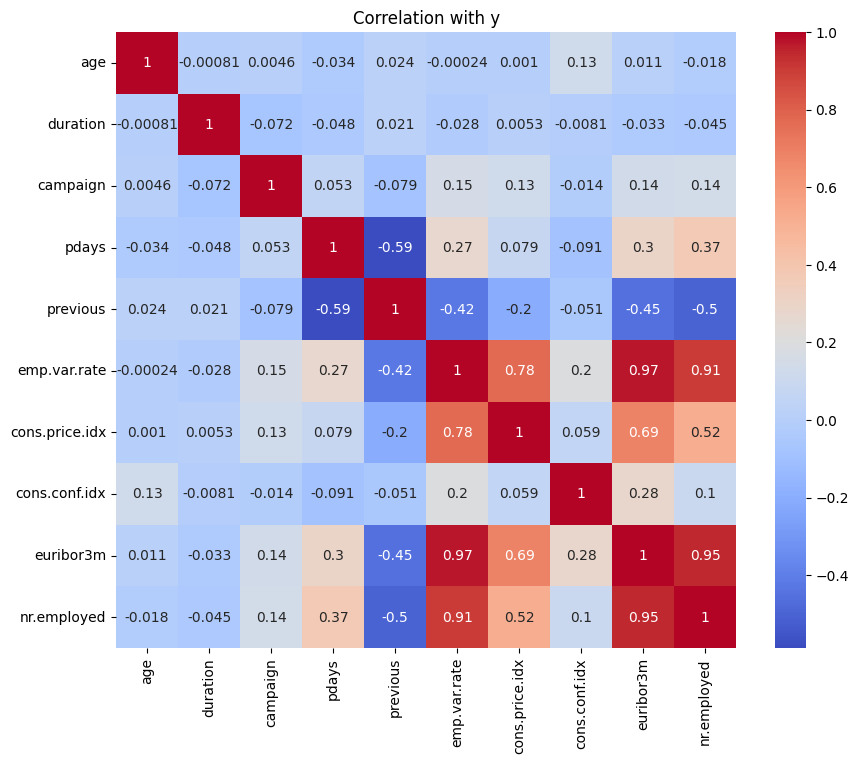

In [16]:
num_cols = df.select_dtypes(['int64', 'float64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation with y')
plt.show()

#### Data Engineering : Column pdays

In [17]:
df['pdays'] = (df['pdays'] != 999).astype(int)

In [18]:
df['pdays']

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: pdays, Length: 41176, dtype: int32

##### Check Distribution

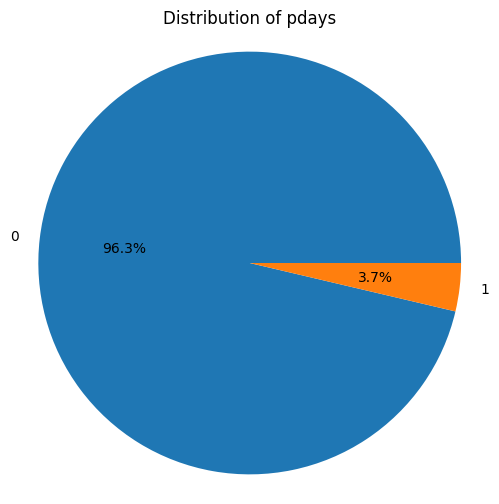

In [19]:
counts = df['pdays'].value_counts()
labels = counts.index
sizes = counts.values

plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%',  
)
plt.title("Distribution of pdays")
plt.axis('equal') 
plt.show()

#### Check Columns 

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Check Target column

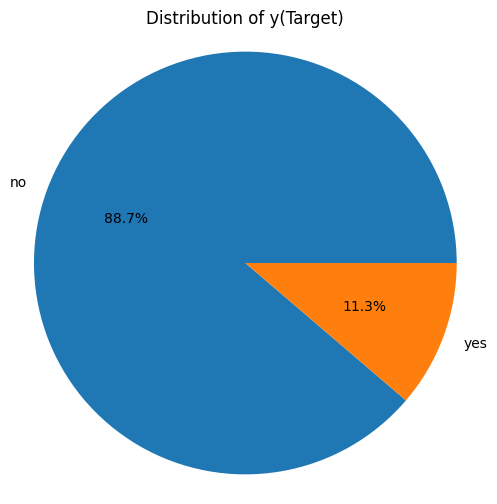

In [21]:
counts = df['y'].value_counts()
labels = counts.index
sizes = counts.values

plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%',  
)
plt.title("Distribution of y(Target)")
plt.axis('equal') 
plt.show()

### Check Relationships

#### Check Age with y (Target)

In [22]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

df['age_group'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
    right=False
)

In [23]:
data = (
    df.groupby(['age_group', 'y'])
      .size()
      .reset_index(name='count')
)

pivot = data.pivot(
    index='age_group',
    columns='y',
    values='count'
).fillna(0)


C:\Users\moham\AppData\Local\Temp\ipykernel_20512\3155816490.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'y'])


<Figure size 1200x600 with 0 Axes>

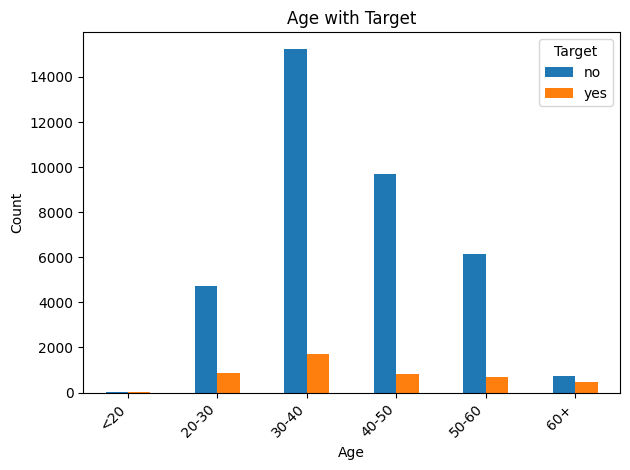

In [24]:
plt.figure(figsize=(12,6))
pivot.plot(kind='bar')
plt.title('Age with Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

#### Check Job with y (Target)

In [25]:
df['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

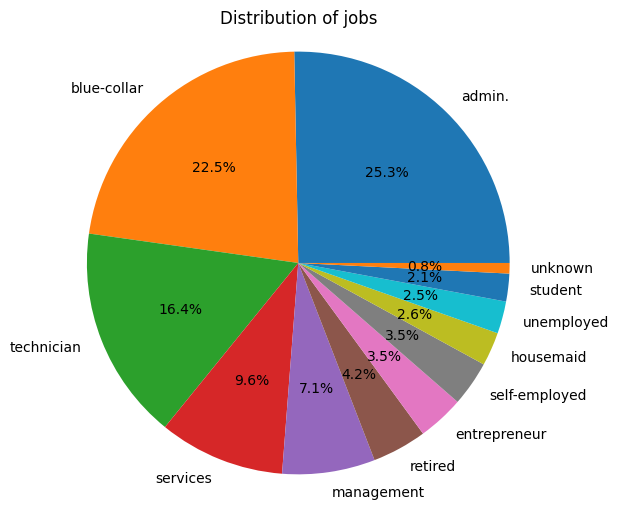

In [26]:
counts = df['job'].value_counts()
labels = counts.index
sizes = counts.values

plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%',  
)
plt.title("Distribution of jobs")
plt.axis('equal') 
plt.show()

In [27]:
data = df.groupby(['job', 'y']).size().reset_index(name='count')

pivot = data.pivot(
    index='job',
    columns='y',
    values='count'
).fillna(0)

<Figure size 1200x600 with 0 Axes>

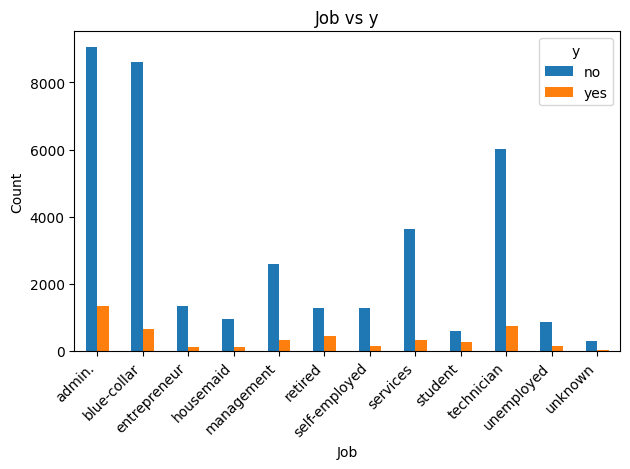

In [28]:
plt.figure(figsize=(12,6))
pivot.plot(kind='bar')
plt.title('Job vs y')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y')
plt.tight_layout()
plt.show()

#### Check education with y (Target)

In [29]:
data = df.groupby(['marital', 'education', 'y']).size().reset_index(name='count')

pivot = data.pivot_table(
    index=['education'],
    columns='y',
    values='count',
    fill_value=0
)

<Figure size 1200x600 with 0 Axes>

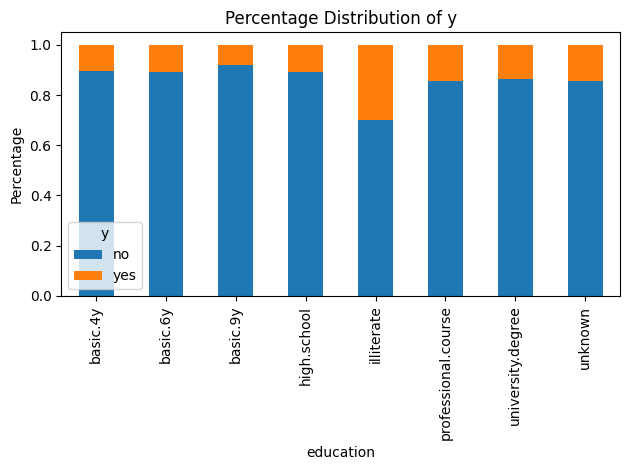

In [30]:
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
pivot_norm.plot(kind='bar', stacked=True)

plt.title('Percentage Distribution of y')
plt.ylabel('Percentage')
plt.legend(title='y')

plt.tight_layout()
plt.show()


#### Check marital status with y (Target)

In [31]:
pivot = data.pivot_table(
    index=['marital'],
    columns='y',
    values='count',
    fill_value=0
)

<Figure size 1200x600 with 0 Axes>

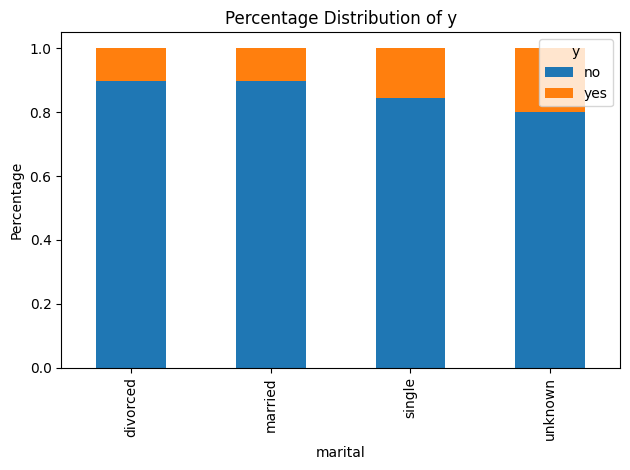

In [32]:
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
pivot_norm.plot(kind='bar', stacked=True)

plt.title('Percentage Distribution of y')
plt.ylabel('Percentage')
plt.legend(title='y')

plt.tight_layout()
plt.show()

#### Check social and economic indicators with y (Target)

In [33]:
num_cols = [
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m'
]

df['y_num'] = df['y'].map({'no': 0, 'yes': 1})

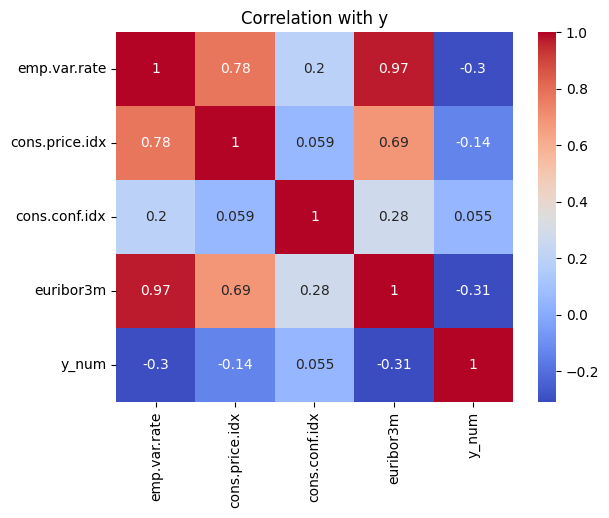

In [34]:
corr = df[num_cols + ['y_num']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation with y')
plt.show()

#### Check Month column (Time)

In [35]:
df['month'].value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [36]:
months_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

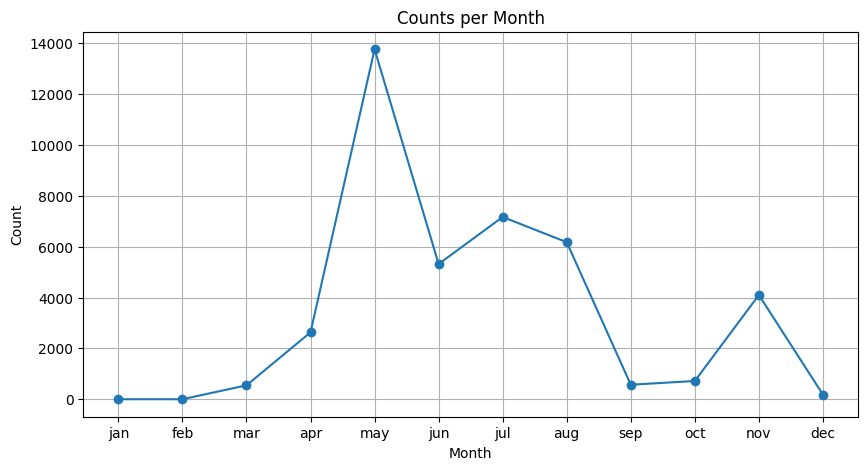

In [37]:
month_counts = df['month'].value_counts().sort_index() 

plt.figure(figsize=(10,5))
plt.plot(month_counts.index, month_counts.values, marker='o')  
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts per Month')
plt.grid(True) 
plt.show()


#### Check previous campaign

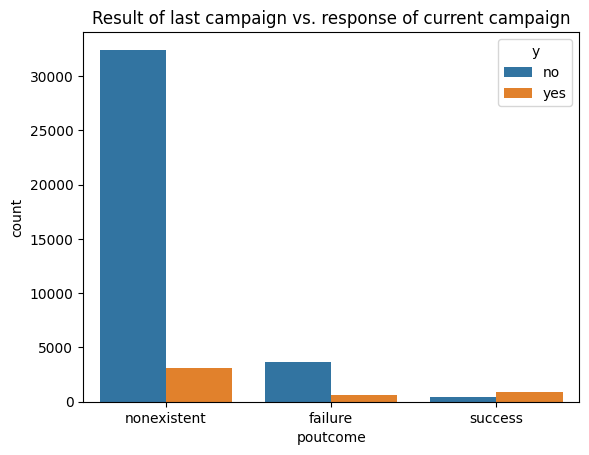

In [38]:
sns.countplot(x='poutcome', hue='y', data=df)
plt.title("Result of last campaign vs. response of current campaign")
plt.show()

## 4️⃣ Data Cleaning

### Handel Outliers

In [39]:
def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

In [40]:
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
df = handle_outliers_iqr(df, numeric_cols)

In [41]:
# حفظ الملف باسم bank_cleaned.csv
df.to_csv(r'Dashboard\Dataset\bank_cleaned.csv', index=False)

## 5️⃣ Data Preprocessing 

### Handle categorical features

In [42]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,y_num
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,0


In [43]:
df.drop(columns=['age_group', 'y_num'], inplace=True)

In [44]:
cat_cols = df.select_dtypes(['object','category']).columns
print(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [45]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## 6️⃣ Split Data into Features and Target

In [46]:
X = df.drop(columns=['cons.conf.idx', 'campaign', 'duration', 'y'])
y = df['y']

In [47]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,0,0,1,1.1,93.994,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,0,0,1,1.1,93.994,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,0,0,1,1.1,93.994,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,0,0,1,1.1,93.994,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,0,0,1,1.1,93.994,4.857,5191.0


## 7️⃣ Modeling 

In [48]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

In [49]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=1.0) # Keeps random_state=None for variety per fold

all_results = []

print("--- Evaluating Models with Multiple Metrics ---")

for name, model in models.items():
    # Create the Pipeline: Undersample -> Train Model
    pipeline = Pipeline([
        ('under', undersample),
        ('clf', model)
    ])
    
    # Execute multi-metric cross-validation
    cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring_metrics)
    
    # Collect the average results for each metric
    model_scores = {
        'Model': name,
        'Accuracy': cv_results['test_accuracy'].mean(),
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1-Score': cv_results['test_f1'].mean()
    }
    all_results.append(model_scores)

--- Evaluating Models with Multiple Metrics ---


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase t

In [50]:
results_df = pd.DataFrame(all_results)

best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_f1 = results_df['F1-Score'].max()

print("\n📊 Final Results Summary:")
display(results_df.sort_values(by='F1-Score', ascending=False))

print(f"\n🏆 The Winner is: {best_model_name} with an F1-Score of {best_f1:.4f}")


📊 Final Results Summary:


,Model,Accuracy,Precision,Recall,F1-Score
2,Gradient Boosting,0.829901,0.357829,0.639787,0.458876
0,Logistic Regression,0.783660,0.295482,0.663288,0.408779
1,Random Forest,0.770085,0.280709,0.665657,0.394860



🏆 The Winner is: Gradient Boosting with an F1-Score of 0.4589


## Thank you 🎀🫶🏻